In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from FastGomokuBoard import FastGomokuBoard as Board
from FwdLookingPolicy import FwdLookingPolicy
from FwdLookingAgent import FwdLookingAgent as Agent

In [3]:
A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,Q,R,S,T = 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19

In [4]:
board = Board.from_csv("FwdLookingStudy.csv", size=19, disp_width=10 )
board.undo()

In [5]:
board = Board(size=19, disp_width=10)

In [6]:
p = FwdLookingPolicy(board)

In [7]:
agent = Agent(board, depth=6)

{'reason': 'defensive MUST move', 'move': (17, 13)}


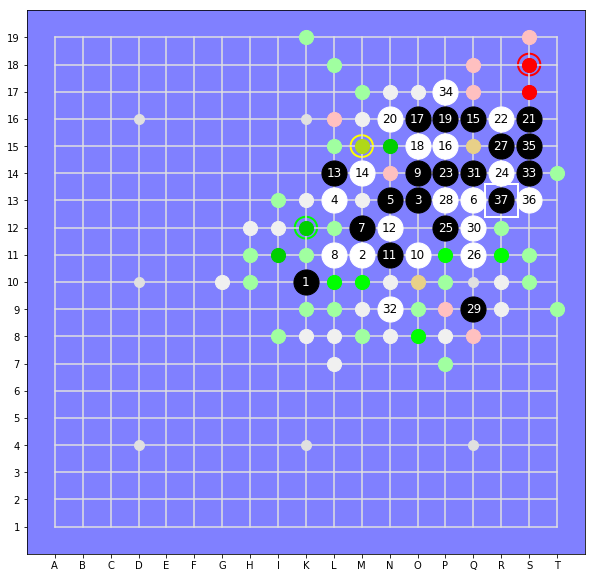

In [67]:
board.set(S, 13)
agent.move()
board.undo()
board.display()

{'reason': 'defensive MUST move', 'move': (17, 13)}

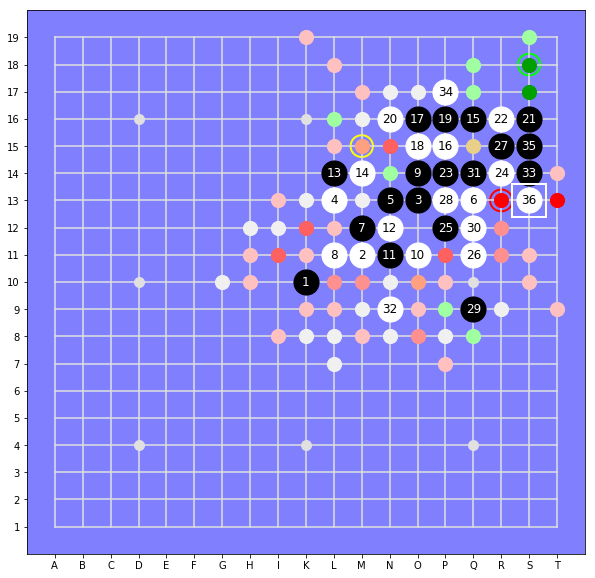

In [68]:
board.undo()
board.display()
agent.suggest()

In [27]:
board.top(1), board.top(1)[1][0][1]

(([[(16, 14), 1.6446904455280995]],
  [[(13, 15), 2.92328354456659]],
  [[(13, 15), 4.283330502019352]]),
 2.92328354456659)

In [69]:
board.get_scores(0, R, 13)

(0.0, 3.3019272488946263)

In [38]:
agent.board.lsh.heuristics.tactical_threshold()

3.244902209372122

In [57]:
board.get_counts_and_scores(1,P,14)

[[144, 64], [16, 100], [4, 8], [0, 28]]


[[(0, 1), (1, 1), (1, 1), (3, 2)], [0.0, 1.0, 1.0, 3.4460950649911055]]

In [30]:
board.getnh(P,14)

(266384, 470312000)

In [52]:
x,y=P,14
def lines_for(x, y):
    b, w = board.getnh(x,y)
    lines = [
        [(nh & (0xFF << 8*direction)) >> 8*direction for nh in (b, w)] 
        for direction in range(4)]
    return lines
lines

[[144, 64], [16, 100], [4, 8], [0, 28]]

In [51]:
board.boundary_mask(P, 14)

268435456

In [37]:
from GomokuTools import GomokuTools as tools

In [39]:
tools.as_bits(28)

[0, 0, 0, 1, 1, 1, 0, 0]

In [45]:
board.lsh.lookup_score(lines[3], c=1)

((3, 2), 3.4460950649911055)

In [56]:
board.nw_edges(P,14)

(None, None)